In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
movies = pd.read_csv(r'D:\ML Projects\movie_data/movies.csv')
ratings = pd.read_csv(r'D:\ML Projects\movie_data/ratings.csv')
tags = pd.read_csv(r'D:\ML Projects\movie_data/tags.csv')

In [3]:
# Display the shape of the dataset
print("Shape of the 'movies.csv' file:", movies.shape)

Shape of the 'movies.csv' file: (9742, 3)


In [4]:
print("Shape of the 'ratings.csv' file:", ratings.shape)

Shape of the 'ratings.csv' file: (100836, 4)


In [5]:
unique_users = ratings['userId'].nunique()
print("Number of unique userIds:", unique_users)

Number of unique userIds: 610


In [6]:
# Count the number of ratings for each movieId
rating_counts = ratings['movieId'].value_counts().reset_index()
rating_counts.columns = ['movieId', 'ratingCount']

In [7]:
# Merge with the movies dataset to get the movie titles
movie_ratings = pd.merge(rating_counts, movies, on='movieId')

In [8]:
# Find the movie with the maximum number of ratings
max_rated_movie = movie_ratings[movie_ratings['ratingCount'] == movie_ratings['ratingCount'].max()]

In [9]:
print("Movie with the maximum number of ratings:")
print(max_rated_movie[['title', 'ratingCount']])

Movie with the maximum number of ratings:
                 title  ratingCount
0  Forrest Gump (1994)          329


In [10]:
# Find the movieId for "The Matrix (1999)"
matrix_id = movies[movies['title'] == "Matrix, The (1999)"]['movieId'].iloc[0]

In [11]:
# Filter tags for "The Matrix (1999)"
matrix_tags = tags[tags['movieId'] == matrix_id]

In [12]:
# Get unique tags
unique_tags = matrix_tags['tag'].unique()

In [13]:
print("Unique tags for 'The Matrix (1999)':")
print(unique_tags)

Unique tags for 'The Matrix (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [14]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_id = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].iloc[0]

In [15]:
# Filter ratings for "Terminator 2: Judgment Day (1991)"
terminator_ratings = ratings[ratings['movieId'] == terminator_id]

In [16]:
# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

In [17]:
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


In [18]:
# Find the movieId for "Fight Club (1999)"
fight_club_id = movies[movies['title'] == "Fight Club (1999)"]['movieId'].iloc[0]

In [19]:
# Filter ratings for "Fight Club (1999)"
fight_club_ratings = ratings[ratings['movieId'] == fight_club_id]

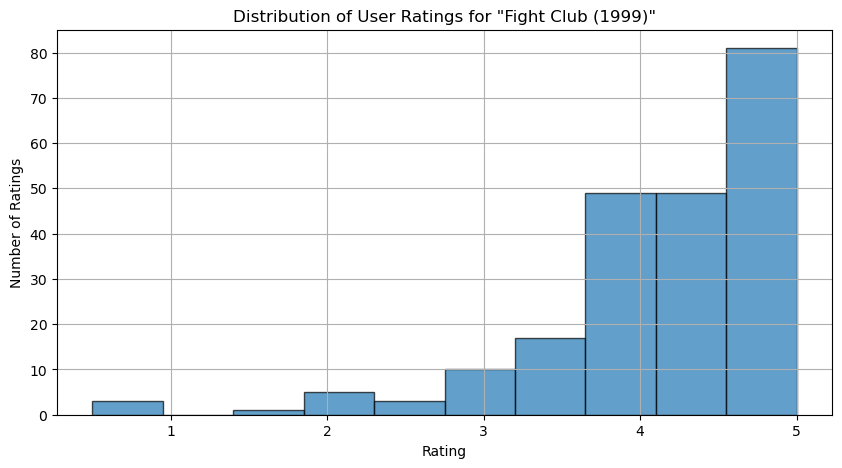

In [20]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 5))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

In [21]:
# Group ratings by movieId and calculate count and mean
rating_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
rating_stats.columns = ['movieId', 'ratingCount', 'averageRating']

In [22]:
# Inner join the grouped data with the movies data
movie_data = pd.merge(movies, rating_stats, on='movieId', how='inner')

In [23]:
# Filter movies with more than 50 user ratings
filtered_movies = movie_data[movie_data['ratingCount'] > 50]

In [24]:
print("Data prepared with movies having more than 50 ratings:")
print(filtered_movies.head())  # Display the first few rows to check the result

Data prepared with movies having more than 50 ratings:
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  ratingCount  averageRating  
0  Adventure|Animation|Children|Comedy|Fantasy          215       3.920930  
1                   Adventure|Children|Fantasy          110       3.431818  
2                               Comedy|Romance           52       3.259615  
5                        Action|Crime|Thriller          102       3.946078  
6                               Comedy|Romance           54       3.185185  


In [25]:
# List of specific movies to check
movie_titles = [
    "Godfather, The (1972)",
    "Shawshank Redemption, The (1994)",
    "Jumanji (1995)",
    "Wolf of Wall Street, The (2013)"
]

In [26]:
# Filter the DataFrame to include only the specified movies
specific_movies = filtered_movies[filtered_movies['title'].isin(movie_titles)]

In [27]:
# Find the movie with the highest average rating
most_popular_movie = specific_movies.loc[specific_movies['averageRating'].idxmax()]

In [28]:
print("The most popular movie based on average ratings is:")
print(most_popular_movie[['title', 'averageRating']])

The most popular movie based on average ratings is:
title            Shawshank Redemption, The (1994)
averageRating                            4.429022
Name: 277, dtype: object


In [29]:
# Sort the DataFrame by 'ratingCount' in descending order and get the top 5
top_rated_movies = filtered_movies.sort_values(by='ratingCount', ascending=False).head(5)

In [30]:
# List of movies to check
movies_to_check = [
    "Pulp Fiction (1994)",
    "Bad Boys (1995)",
    "Silence of the Lambs, The (1991)",
    "Matrix, The (1999)"
]

In [31]:
# Filter the top 5 to see if any of the specified movies are included
top_movies_check = top_rated_movies[top_rated_movies['title'].isin(movies_to_check)]

In [32]:
print("Specified movies in the top 5 based on the number of user ratings:")
print(top_movies_check[['title', 'ratingCount']])

Specified movies in the top 5 based on the number of user ratings:
                                 title  ratingCount
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


In [33]:
# Filter for Sci-Fi movies
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains("Sci-Fi")]

In [34]:
# Sort the Sci-Fi movies by 'ratingCount' in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='ratingCount', ascending=False)

In [35]:
# Select the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]  # Indexing starts at 0

In [36]:
print("Third most popular Sci-Fi movie based on the number of user ratings:")
print(third_most_popular_sci_fi[['title', 'ratingCount']])

Third most popular Sci-Fi movie based on the number of user ratings:
title          Jurassic Park (1993)
ratingCount                     238
Name: 418, dtype: object


In [78]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import time

In [80]:
# Function to scrape IMDb reviews for a given IMDb ID
def scrape_imdb_reviews(imdb_id):
    reviews = []
    imdb_id_str = str(imdb_id).zfill(7)  # Ensure the IMDb ID is 7 digits
    url = f"https://www.imdb.com/title/tt{imdb_id_str}/reviews"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0'
    }
    
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            review_elements = soup.find_all('div', class_='text show-more__control')
            reviews = [review.get_text() for review in review_elements]
            if not reviews:
                print(f"No reviews found for IMDb ID {imdb_id}")
        else:
            print(f"Failed to retrieve reviews for IMDb ID {imdb_id}: Status Code {response.status_code}")
    except Exception as e:
        print(f"Error occurred while scraping IMDb ID {imdb_id}: {str(e)}")
    
    return reviews

In [86]:
# Load the links.csv file
ratings_df = pd.read_csv(r'D:\ML Projects\movie_data/ratings.csv')

In [88]:
# Calculate the number of ratings for each movie
rating_counts = ratings_df.groupby('movieId').size().reset_index(name='ratingCount')

In [90]:
# Now filter movies with more than 50 ratings
filtered_movies = rating_counts[rating_counts['ratingCount'] > 50]

In [92]:
# Merge with links_df to get the corresponding IMDb IDs
filtered_links = pd.merge(filtered_movies, links_df, on='movieId')

In [94]:
# Extract the IMDb IDs for the filtered movies
imdb_ids = filtered_links['imdbId'].tolist()

In [96]:
# Initialize a dictionary to store the reviews
all_reviews = {}

In [98]:
# Function to scrape IMDb reviews for a given IMDb ID
def scrape_imdb_reviews(imdb_id):
    reviews = []
    imdb_id_str = str(imdb_id).zfill(7)  # Ensure the IMDb ID is 7 digits
    url = f"https://www.imdb.com/title/tt{imdb_id_str}/reviews"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0'
    }
    
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            review_elements = soup.find_all('div', class_='text show-more__control')
            reviews = [review.get_text() for review in review_elements]
            if not reviews:
                print(f"No reviews found for IMDb ID {imdb_id}")
        else:
            print(f"Failed to retrieve reviews for IMDb ID {imdb_id}: Status Code {response.status_code}")
    except Exception as e:
        print(f"Error occurred while scraping IMDb ID {imdb_id}: {str(e)}")
    
    return reviews

In [100]:
# Scrape reviews for each IMDb ID
start_time = time.time()
for imdb_id in imdb_ids:
    try:
        reviews = scrape_imdb_reviews(imdb_id)
        all_reviews[imdb_id] = reviews
        
        # Save intermediate results to avoid data loss
        with open('imdb_reviews.json', 'w') as f:
            json.dump(all_reviews, f)
        
    except Exception as e:
        print(f"Failed to scrape IMDb ID {imdb_id}: {e}")

In [101]:
end_time = time.time()
print(f"Scraping completed in {end_time - start_time} seconds")

Scraping completed in 841.0442967414856 seconds


In [102]:
# Save the final results
with open('final_imdb_reviews.json', 'w') as f:
    json.dump(all_reviews, f)

In [124]:
# Load the CSV files
ratings_df = pd.read_csv(r'D:\ML Projects\movie_data/ratings.csv')
links_df = pd.read_csv(r'D:\ML Projects\movie_data/links.csv')
movies_df = pd.read_csv(r'D:\ML Projects\movie_data/movies.csv')

In [126]:
average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
average_ratings = average_ratings.rename(columns={'rating': 'averageRating'})

In [128]:
merged_df = pd.merge(average_ratings, links_df, on='movieId')

In [130]:
highest_rated_movie = merged_df.loc[merged_df['averageRating'].idxmax()]

In [132]:
highest_rated_movie_title = movies_df[movies_df['movieId'] == highest_rated_movie['movieId']]['title'].values[0]

In [134]:
# Output the results
print(f"Movie ID with the highest IMDb rating: {highest_rated_movie['movieId']}")
print(f"IMDb ID: {highest_rated_movie['imdbId']}")
print(f"Movie Title: {highest_rated_movie_title}")
print(f"Average Rating: {highest_rated_movie['averageRating']}")

Movie ID with the highest IMDb rating: 53.0
IMDb ID: 110299.0
Movie Title: Lamerica (1994)
Average Rating: 5.0


In [136]:
sci_fi_movies = movies_df[movies_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

In [138]:
sci_fi_ratings = pd.merge(sci_fi_movies, merged_df, on='movieId')

In [140]:
highest_rated_sci_fi_movie = sci_fi_ratings.loc[sci_fi_ratings['averageRating'].idxmax()]

In [142]:
# Output the results
print(f"Movie ID with the highest IMDb rating in Sci-Fi genre: {highest_rated_sci_fi_movie['movieId']}")
print(f"IMDb ID: {highest_rated_sci_fi_movie['imdbId']}")
print(f"Movie Title: {highest_rated_sci_fi_movie['title']}")
print(f"Average Rating: {highest_rated_sci_fi_movie['averageRating']}")

Movie ID with the highest IMDb rating in Sci-Fi genre: 3687
IMDb ID: 95525
Movie Title: Light Years (Gandahar) (1988)
Average Rating: 5.0
